<a href="https://colab.research.google.com/github/NurayBashirli/HW1/blob/main/Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

     |████████████████████████████████| 9.8 MB 14.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 1.4 MB 20.6 MB/s 


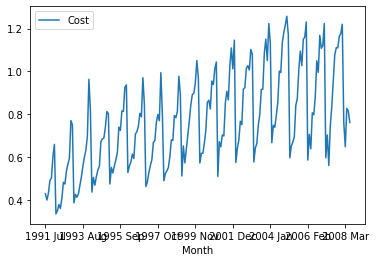

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [3]:
import pandas as pd

# Load the data
ap1 = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1 = ap1.set_index('Month')

# Display the DataFrame
print(ap1)

              Cost
Month             
1991 Jul  0.429795
1991 Aug  0.400906
1991 Sep  0.432159
1991 Oct  0.492543
1991 Nov  0.502369
...            ...
2008 Feb  0.761822
2008 Mar  0.649435
2008 Apr  0.827887
2008 May  0.816255
2008 Jun  0.762137

[204 rows x 1 columns]


Using the above data set
1)Test stationary of the
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

In [4]:
#Q1 Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(ap1['Cost'])

# Extract test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Define significance level
alpha = 0.05

# Print results
print(f'Test Statistic: {test_statistic}')
print(f'p-value: {p_value}')

# Interpret the results
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. The data is stationary.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The data is non-stationary.")

Test Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Conclusion: Fail to reject the null hypothesis. The data is non-stationary.


In [5]:
#Q2 Take difference and seasonal difference and test stationay of the dataset.Write hypothesis.
#What is your conclusion at 5% siginifance level?
# Take the first difference
ap1_diff = ap1.diff().dropna()

# Take the seasonal difference
seasonal_period = 12  # Assuming monthly data
ap1_seasonal_diff = ap1_diff.diff(periods=seasonal_period).dropna()

# Perform Augmented Dickey-Fuller test
result_seasonal_diff = adfuller(ap1_seasonal_diff['Cost'])

# Extract test statistic and p-value
test_statistic_seasonal_diff = result_seasonal_diff[0]
p_value_seasonal_diff = result_seasonal_diff[1]

# Print results
print(f'Test Statistic (Seasonal Difference): {test_statistic_seasonal_diff}')
print(f'p-value (Seasonal Difference): {p_value_seasonal_diff}')

# Interpret the results
if p_value_seasonal_diff < alpha:
    print("Conclusion: Reject the null hypothesis. The data after taking seasonal difference is stationary.")
else:
    print("Conclusion: Fail to reject the null hypothesis. The data after taking seasonal difference is non-stationary.")

Test Statistic (Seasonal Difference): -5.07040327971582
p-value (Seasonal Difference): 1.607283495966982e-05
Conclusion: Reject the null hypothesis. The data after taking seasonal difference is stationary.


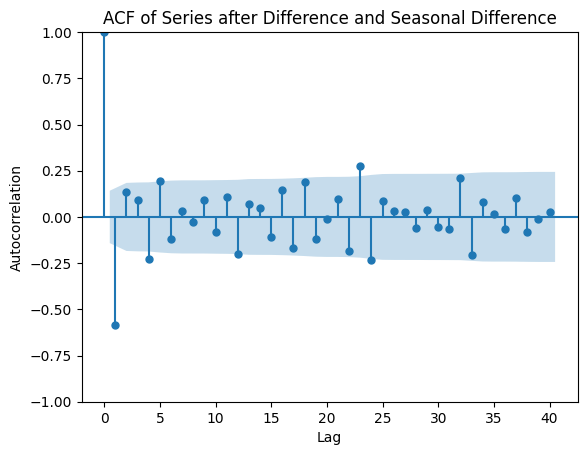

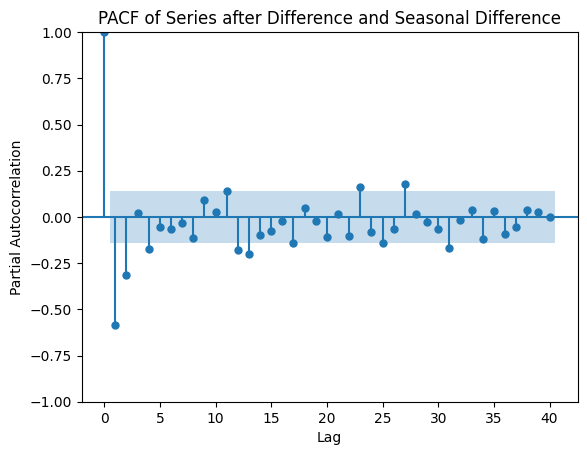

In [6]:
#Q3 Plot ACF and PACF of series if series' difference and seasonal difference taken.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF of series after taking both difference and seasonal difference
plot_acf(ap1_seasonal_diff['Cost'], lags=40)
plt.title('ACF of Series after Difference and Seasonal Difference')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF of series after taking both difference and seasonal difference
plot_pacf(ap1_seasonal_diff['Cost'], lags=40)
plt.title('PACF of Series after Difference and Seasonal Difference')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

In [7]:
#Q4 Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model 1
sarima_model_1 = SARIMAX(ap1, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
results_1 = sarima_model_1.fit()

# Fit SARIMA model 2
sarima_model_2 = SARIMAX(ap1, order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
results_2 = sarima_model_2.fit()

# Compare AIC
aic_1 = results_1.aic
aic_2 = results_2.aic

print(f'AIC of SARIMA model 1: {aic_1}')
print(f'AIC of SARIMA model 2: {aic_2}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

AIC of SARIMA model 1: -558.8409709109526
AIC of SARIMA model 2: -555.8775257679571


In [8]:
#Q5 Split data into train and test. For the test data, use last 12 months observation.
# Determine the index to split the data
split_index = len(ap1) - 12

# Split the data into train and test sets
train_data = ap1.iloc[:split_index]
test_data = ap1.iloc[split_index:]

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Train data shape: (192, 1)
Test data shape: (12, 1)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/loc

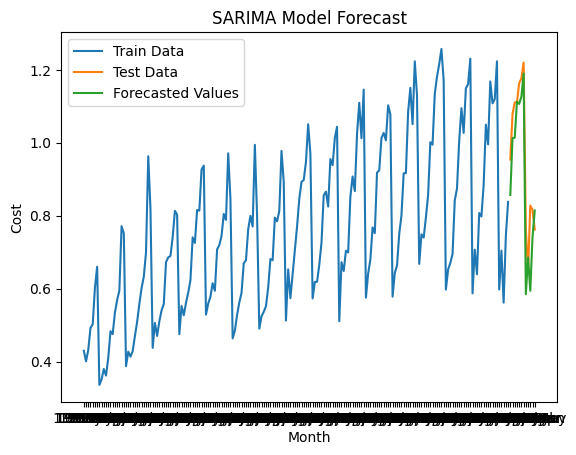

Performance Metrics:
MAE: 0.08112365646945496
MAPE: nan
MSE: 0.010452310751076693


In [10]:
#Q6 Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate
#error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train the SARIMA model
sarima_model = SARIMAX(train_data, order=(2, 1, 2), seasonal_order=(1, 1, 1, 12))
results = sarima_model.fit()

# Forecast values for the test period
forecast_values = results.get_forecast(steps=len(test_data))
forecast_mean = forecast_values.predicted_mean

# Plot train, test, and forecasted values
plt.plot(train_data.index, train_data['Cost'], label='Train Data')
plt.plot(test_data.index, test_data['Cost'], label='Test Data')
plt.plot(test_data.index, forecast_mean, label='Forecasted Values')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.title('SARIMA Model Forecast')
plt.legend()
plt.show()

# Calculate performance metrics
mae = mean_absolute_error(test_data['Cost'], forecast_mean)
mape = np.mean(np.abs((test_data['Cost'] - forecast_mean) / test_data['Cost'])) * 100
mse = mean_squared_error(test_data['Cost'], forecast_mean)

# Print performance metrics
print("Performance Metrics:")
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


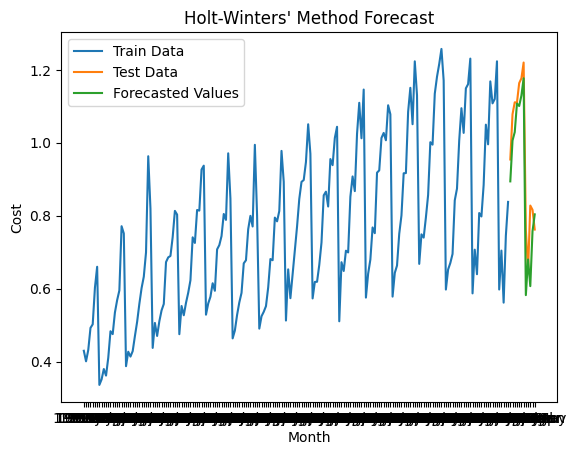

Performance Metrics for Holt-Winters' Method:
MAE: 0.07507276877874457
MAPE: nan
MSE: 0.009223005255865484


In [11]:
#Q7 Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast
#values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage
#error) and MSE(Mean squared Error).
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train the Holt-Winters model
hw_model = ExponentialSmoothing(train_data['Cost'], seasonal='multiplicative', seasonal_periods=12)
hw_results = hw_model.fit()

# Forecast values for the test period
forecast_values_hw = hw_results.forecast(len(test_data))

# Plot train, test, and forecasted values
plt.plot(train_data.index, train_data['Cost'], label='Train Data')
plt.plot(test_data.index, test_data['Cost'], label='Test Data')
plt.plot(test_data.index, forecast_values_hw, label='Forecasted Values')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.title("Holt-Winters' Method Forecast")
plt.legend()
plt.show()

# Calculate performance metrics
mae_hw = mean_absolute_error(test_data['Cost'], forecast_values_hw)
mape_hw = np.mean(np.abs((test_data['Cost'] - forecast_values_hw) / test_data['Cost'])) * 100
mse_hw = mean_squared_error(test_data['Cost'], forecast_values_hw)

# Print performance metrics
print("Performance Metrics for Holt-Winters' Method:")
print("MAE:", mae_hw)
print("MAPE:", mape_hw)
print("MSE:", mse_hw)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


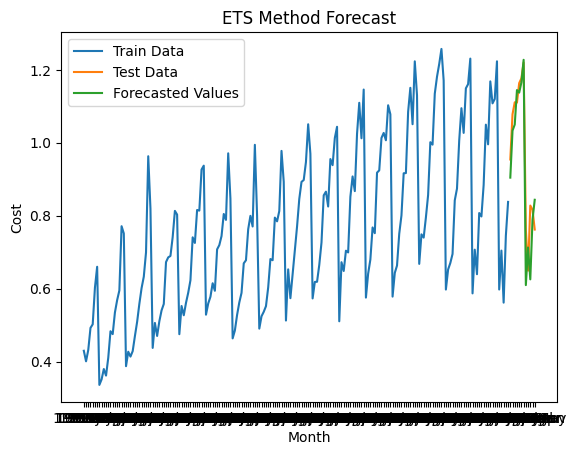

Performance Metrics for ETS Method:
MAE: 0.06342259958610598
MAPE: nan
MSE: 0.007144180936718845


In [12]:
#Q8  Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or
#not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of
#MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train the ETS model
ets_model = ExponentialSmoothing(train_data['Cost'], trend='add', damped_trend=False, seasonal='add', seasonal_periods=12)
ets_results = ets_model.fit()

# Forecast values for the test period
forecast_values_ets = ets_results.forecast(len(test_data))

# Plot train, test, and forecasted values
plt.plot(train_data.index, train_data['Cost'], label='Train Data')
plt.plot(test_data.index, test_data['Cost'], label='Test Data')
plt.plot(test_data.index, forecast_values_ets, label='Forecasted Values')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.title("ETS Method Forecast")
plt.legend()
plt.show()

# Calculate performance metrics
mae_ets = mean_absolute_error(test_data['Cost'], forecast_values_ets)
mape_ets = np.mean(np.abs((test_data['Cost'] - forecast_values_ets) / test_data['Cost'])) * 100
mse_ets = mean_squared_error(test_data['Cost'], forecast_values_ets)

# Print performance metrics
print("Performance Metrics for ETS Method:")
print("MAE:", mae_ets)
print("MAPE:", mape_ets)
print("MSE:", mse_ets)

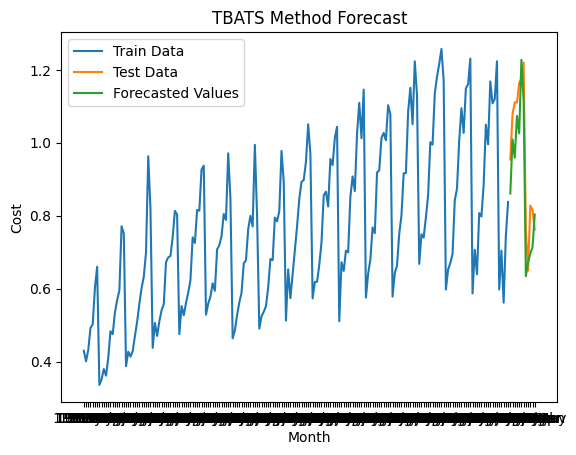

Performance Metrics for TBATS Method:
MAE: 0.0891266895364744
MAPE: 9.334577263740044
MSE: 0.009727447798568252


In [20]:
#Q9 Use TBATS model in train data. Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS method.
#In terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).
from tbats import TBATS
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure the input data is in the correct format
train_cost = train_data['Cost'].values.reshape(-1)
test_cost = test_data['Cost'].values.reshape(-1)

# Train the TBATS model
tbats_model = TBATS(seasonal_periods=[12])
tbats_results = tbats_model.fit(train_cost)

# Forecast values for the test period
forecast_values_tbats = tbats_results.forecast(steps=len(test_data))

# Plot train, test, and forecasted values
plt.plot(train_data.index, train_cost, label='Train Data')
plt.plot(test_data.index, test_cost, label='Test Data')
plt.plot(test_data.index, forecast_values_tbats, label='Forecasted Values')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.title("TBATS Method Forecast")
plt.legend()
plt.show()

# Calculate performance metrics
mae_tbats = mean_absolute_error(test_cost, forecast_values_tbats)
mape_tbats = np.mean(np.abs((test_cost - forecast_values_tbats) / test_cost)) * 100
mse_tbats = mean_squared_error(test_cost, forecast_values_tbats)

# Print performance metrics
print("Performance Metrics for TBATS Method:")
print("MAE:", mae_tbats)
print("MAPE:", mape_tbats)
print("MSE:", mse_tbats)


In [38]:
#Q10 Which model gives the lowes MAPE score?
# Create a dictionary of MAPE scores for each model
mape_scores = {
    'Holt-Winters': mape_hw,
    'ETS': mape_ets,
    'TBATS': mape_tbats
}

# Find the model with the lowest MAPE score
best_model = min(mape_scores, key=mape_scores.get)

print("The model with the lowest MAPE score is:", best_model)


The model with the lowest MAPE score is: Holt-Winters
